In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow.python.client import device_lib

In [4]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 461574643267750303
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2241331200
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3693033043361653235
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [5]:
!pip install scipy

In [6]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [7]:
import scipy

In [8]:
import pandas as pd

In [9]:
class_old = os.listdir("C:/Users/LENOVO/test")
class_old

['apple',
 'apple_pie',
 'avocado',
 'ayam_crispy',
 'ayam_goreng',
 'ayam_pop',
 'banana',
 'beach plum',
 'bibimbap',
 'black berry',
 'blueberry',
 'bread_pudding',
 'cannoli',
 'carrot_cake',
 'cashew',
 'cheesecake',
 'cherry',
 'chicken_curry',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'club_sandwich',
 'cocoa bean',
 'coconut',
 'coffee',
 'corn kernel',
 'cranberry',
 'creme_brulee',
 'cup_cakes',
 'daging_rendang',
 'date',
 'dendeng_batokok',
 'donuts',
 'dragonfruit',
 'durian',
 'eggplant',
 'french_fries',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'galia melon',
 'garlic_bread',
 'grape',
 'grapefruit',
 'greek_salad',
 'grilled_salmon',
 'guava',
 'gulai_ikan',
 'gulai_tambusu',
 'gulai_tunjang',
 'gyoza',
 'hamburger',
 'honeyberry',
 'hot_and_sour_soup',
 'hot_dog',
 'ice_cream',
 'jackfruit',
 'jalapeno',
 'kiwi',
 'langsat',
 'lasagna',
 'lemon',
 'lime',
 'lobster_roll_sandwich',
 'lychee',
 'macaroni_and_cheese',
 'macarons',


In [10]:
class_deleted = ['beach plum',
'bibimbap',
'black berry',
'bread_pudding',
'cannoli',
'carrot_cake',
'cashew',
'chocolate_mousse',
'club_sandwich',
'cocoa bean',
'cranberry',
'dendeng_batokok',
'eggplant',
'fried_calamari',
'garlic_bread',
'greek_salad',
'gulai_tambusu',
'gulai_tunjang',
'gyoza',
'honeyberry',
'hot_and_sour_soup',
'jackfruit',
'jalapeno',
'langsat',
'lemon',
'lobster_roll_sandwich',
'mangosteen',
'melinjo',
'miso_soup',
'mussels',
'olive',
'pad_thai',
'passion fruit',
'pea',
'pear',
'pho',
'raspberry',
'samosa',
'shrimp_and_grits',
'spring_rolls',
'strawberry guava',
'tiramisu',
'vanilla'
]

In [12]:
class_new = [x for x in class_old if x not in class_deleted]
class_new

['apple',
 'apple_pie',
 'avocado',
 'ayam_crispy',
 'ayam_goreng',
 'ayam_pop',
 'banana',
 'blueberry',
 'cheesecake',
 'cherry',
 'chicken_curry',
 'chicken_wings',
 'chocolate_cake',
 'churros',
 'coconut',
 'coffee',
 'corn kernel',
 'creme_brulee',
 'cup_cakes',
 'daging_rendang',
 'date',
 'donuts',
 'dragonfruit',
 'durian',
 'french_fries',
 'fried_rice',
 'frozen_yogurt',
 'galia melon',
 'grape',
 'grapefruit',
 'grilled_salmon',
 'guava',
 'gulai_ikan',
 'hamburger',
 'hot_dog',
 'ice_cream',
 'kiwi',
 'lasagna',
 'lime',
 'lychee',
 'macaroni_and_cheese',
 'macarons',
 'mango',
 'omelette',
 'onion_rings',
 'orange',
 'pancakes',
 'papaya',
 'peanut',
 'peking_duck',
 'pineapple',
 'pizza',
 'pumpkin',
 'rambutan',
 'ramen',
 'red_velvet_cake',
 'salak',
 'sashimi',
 'soup',
 'spaghetti_bolognese',
 'spaghetti_carbonara',
 'steak',
 'strawberry',
 'sushi',
 'takoyaki',
 'telur_balado',
 'telur_dadar',
 'tomato',
 'undefined',
 'waffles',
 'watermelon']

In [13]:
len(class_new)

71

In [14]:
# Helper method to create train_mini and test_mini data samples
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [15]:
src_train = 'train'
dest_train = 'train_fix'
src_test = 'test'
dest_test = 'test_fix'

In [16]:
dataset_mini(class_new, src_train, dest_train)

Copying images into apple
Copying images into apple_pie
Copying images into avocado
Copying images into ayam_crispy
Copying images into ayam_goreng
Copying images into ayam_pop
Copying images into banana
Copying images into blueberry
Copying images into cheesecake
Copying images into cherry
Copying images into chicken_curry
Copying images into chicken_wings
Copying images into chocolate_cake
Copying images into churros
Copying images into coconut
Copying images into coffee
Copying images into corn kernel
Copying images into creme_brulee
Copying images into cup_cakes
Copying images into daging_rendang
Copying images into date
Copying images into donuts
Copying images into dragonfruit
Copying images into durian
Copying images into french_fries
Copying images into fried_rice
Copying images into frozen_yogurt
Copying images into galia melon
Copying images into grape
Copying images into grapefruit
Copying images into grilled_salmon
Copying images into guava
Copying images into gulai_ikan
Co

In [17]:
dataset_mini(class_new, src_test, dest_test)

Copying images into apple
Copying images into apple_pie
Copying images into avocado
Copying images into ayam_crispy
Copying images into ayam_goreng
Copying images into ayam_pop
Copying images into banana
Copying images into blueberry
Copying images into cheesecake
Copying images into cherry
Copying images into chicken_curry
Copying images into chicken_wings
Copying images into chocolate_cake
Copying images into churros
Copying images into coconut
Copying images into coffee
Copying images into corn kernel
Copying images into creme_brulee
Copying images into cup_cakes
Copying images into daging_rendang
Copying images into date
Copying images into donuts
Copying images into dragonfruit
Copying images into durian
Copying images into french_fries
Copying images into fried_rice
Copying images into frozen_yogurt
Copying images into galia melon
Copying images into grape
Copying images into grapefruit
Copying images into grilled_salmon
Copying images into guava
Copying images into gulai_ikan
Co

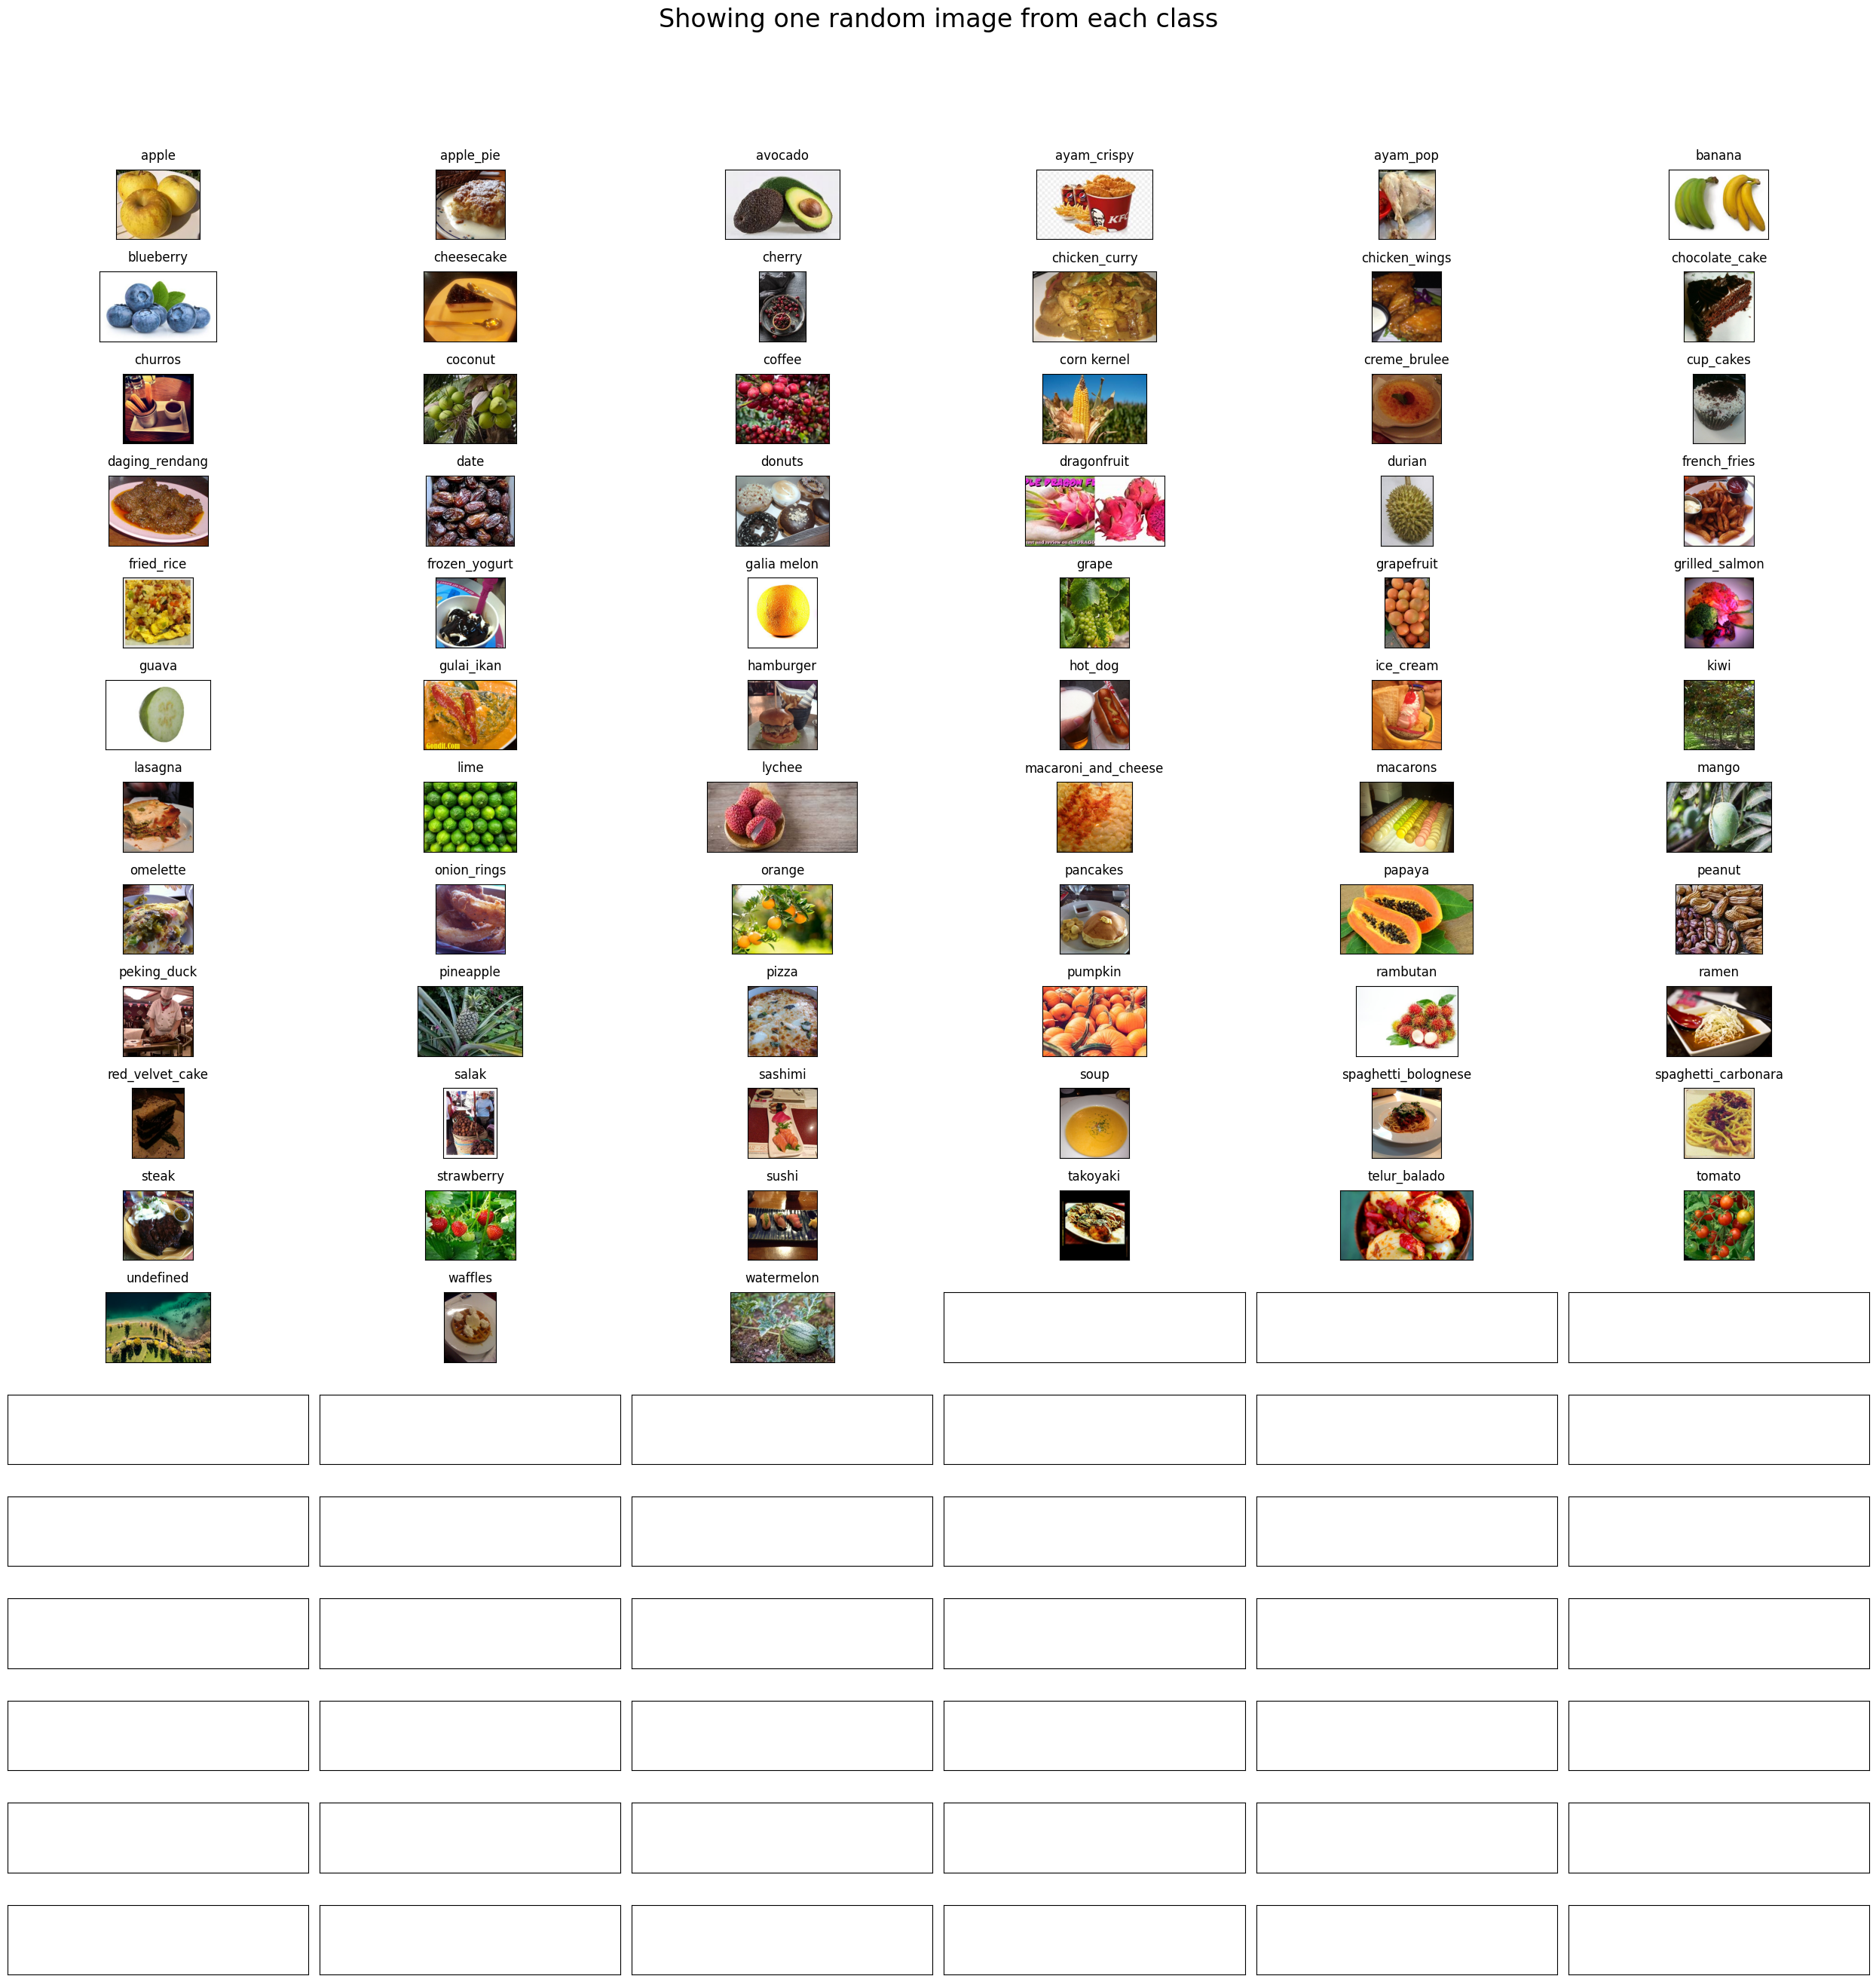

In [19]:
# Visualize the data, showing one image per class from 101 classes
rows = 18
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "C:/Users/LENOVO/train_fix/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [22]:
len(os.listdir("C:/Users/LENOVO/train_fix"))

69

In [23]:
len(os.listdir("C:/Users/LENOVO/test_fix"))

69

In [26]:
n = len(os.listdir("C:/Users/LENOVO/train_fix"))
n

69

In [24]:
count_train = 0
for root_dir, cur_dir, files in os.walk(r'C:/Users/LENOVO/train_fix/'):
    count_train += len(files)
print('file count:', count_train)

file count: 50253


In [25]:
count_test = 0
for root_dir, cur_dir, files in os.walk(r'C:/Users/LENOVO/test_fix/'):
    count_test += len(files)
print('file count:', count_test)

file count: 16768


In [27]:
K.clear_session()
n_classes = n
img_width, img_height = 299, 299
train_data_dir = 'C:/Users/LENOVO/train_fix/'
validation_data_dir = 'C:/Users/LENOVO/test_fix/'
nb_train_samples = count_train
nb_validation_samples = count_test
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(input_shape=(299,299,3), weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n, kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_class.log')

model.summary()

Found 50253 images belonging to 69 classes.
Found 16768 images belonging to 69 classes.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 aliza

                                                                                                  
 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

 conv2d_22 (Conv2D)             (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
          

C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


                                                                                                  
 activation_19 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_19[0][0]'] 
                                                                                                  
 activation_21 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 activation_24 (Activation)     (None, 35, 35, 96)   0           ['batch_normalization_24[0][0]'] 
                                                                                                  
 activation_25 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_25[0][0]'] 
                                                                                                  
 mixed2 (Concatenate)           (None, 35, 35, 288)  0           ['activation_19[0][0]',          
          

 batch_normalization_37 (BatchN  (None, 17, 17, 128)  384        ['conv2d_37[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_32 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_32[0][0]'] 
                                                                                                  
 activation_37 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_37[0][0]'] 
                                                                                                  
 average_pooling2d_3 (AveragePo  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_30

 activation_47 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_47[0][0]'] 
                                                                                                  
 average_pooling2d_4 (AveragePo  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_40 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed4[0][0]']                 
                                                                                                  
 conv2d_43 (Conv2D)             (None, 17, 17, 192)  215040      ['activation_42[0][0]']          
                                                                                                  
 conv2d_48 (Conv2D)             (None, 17, 17, 192)  215040      ['activation_47[0][0]']          
          

 conv2d_50 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_53 (Conv2D)             (None, 17, 17, 192)  215040      ['activation_52[0][0]']          
                                                                                                  
 conv2d_58 (Conv2D)             (None, 17, 17, 192)  215040      ['activation_57[0][0]']          
                                                                                                  
 conv2d_59 (Conv2D)             (None, 17, 17, 192)  147456      ['average_pooling2d_5[0][0]']    
                                                                                                  
 batch_normalization_50 (BatchN  (None, 17, 17, 192)  576        ['conv2d_50[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_69 (Conv2D)             (None, 17, 17, 192)  147456      ['average_pooling2d_6[0][0]']    
                                                                                                  
 batch_normalization_60 (BatchN  (None, 17, 17, 192)  576        ['conv2d_60[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_63 (BatchN  (None, 17, 17, 192)  576        ['conv2d_63[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_68 (BatchN  (None, 17, 17, 192)  576        ['conv2d_68[0][0]']              
 ormalizat

 conv2d_77 (Conv2D)             (None, 8, 8, 384)    491520      ['mixed8[0][0]']                 
                                                                                                  
 conv2d_81 (Conv2D)             (None, 8, 8, 384)    1548288     ['activation_80[0][0]']          
                                                                                                  
 batch_normalization_77 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_81 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_81[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 batch_normalization_90 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_90[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_86 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 activation_90 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_90[0][0]'] 
                                                                                                  
 conv2d_87 (Conv2D)             (None, 8, 8, 384)    442368      ['activation_86[0][0]']          
                                                                                                  
 conv2d_88

In [28]:
history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_new.hdf5')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3600\1876380165.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
3140/3140 [==============================] - ETA: 0s - loss: 3.6315 - accuracy: 0.2699
Epoch 1: val_loss improved from inf to 1.99557, saving model to best_model_class.hdf5
3140/3140 [==============================] - 1498s 471ms/step - loss: 3.6315 - accuracy: 0.2699 - val_loss: 1.9956 - val_accuracy: 0.6663
Epoch 2/30
3140/3140 [==============================] - ETA: 0s - loss: 2.0559 - accuracy: 0.6001
Epoch 2: val_loss improved from 1.99557 to 1.21044, saving model to best_model_class.hdf5
3140/3140 [==============================] - 1339s 426ms/step - loss: 2.0559 - accuracy: 0.6001 - val_loss: 1.2104 - val_accuracy: 0.8065
Epoch 3/30
3140/3140 [==============================] - ETA: 0s - loss: 1.5631 - accuracy: 0.7093
Epoch 3: val_loss improved from 1.21044 to 0.99051, saving model to best_model_class.hdf5
3140/3140 [==============================] - 1343s 428ms/step - loss: 1.5631 - accuracy: 0.7093 - val_loss: 0.9905 - val_accuracy: 0.8479
Epoch 4/30
3140/3140 [====

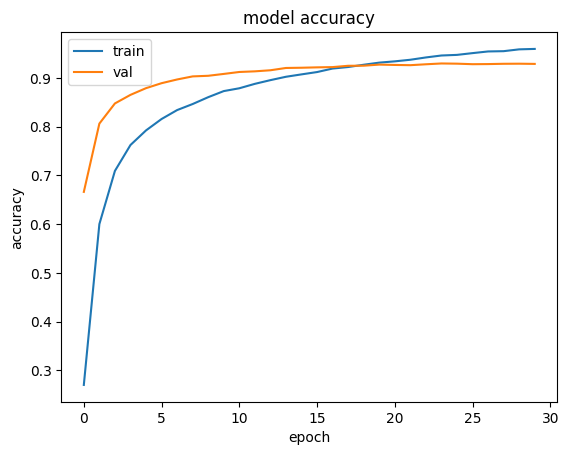

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

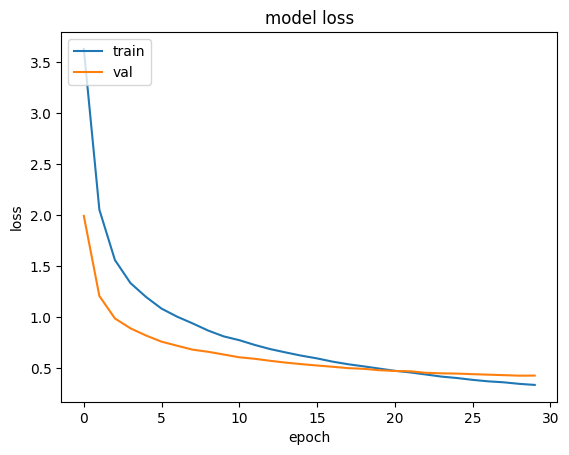

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('best_model_class.hdf5',compile = False)

In [32]:
def predict_class(model, images, show = True):
    for img in images:
        img = image.load_img(img, target_size=(299, 299))
        img = image.img_to_array(img)                    
        img = np.expand_dims(img, axis=0)         
        img /= 255.                                      

        pred = model.predict(img)
        index = np.argmax(pred)
        foods_sorted.sort()
        pred_value = foods_sorted[index]
        if show:
            plt.imshow(img[0])                           
            plt.axis('off')
            plt.title(pred_value)
            plt.show()

1/1 [==============================] - 0s 29ms/step


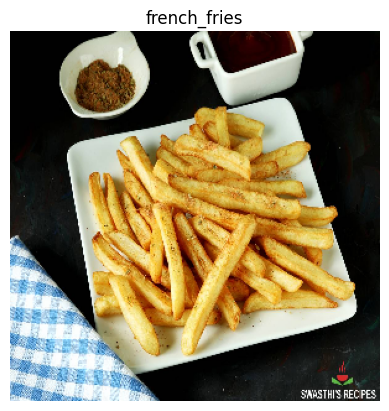

1/1 [==============================] - 0s 32ms/step


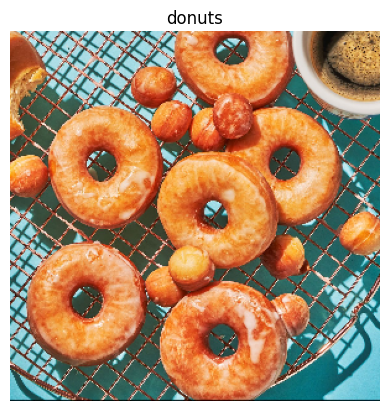

1/1 [==============================] - 0s 30ms/step


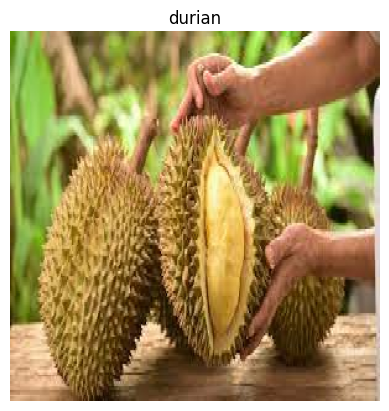

1/1 [==============================] - 0s 42ms/step


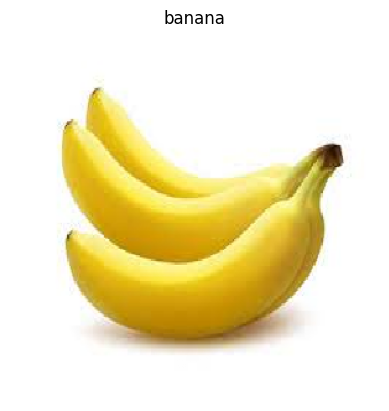

1/1 [==============================] - 0s 39ms/step


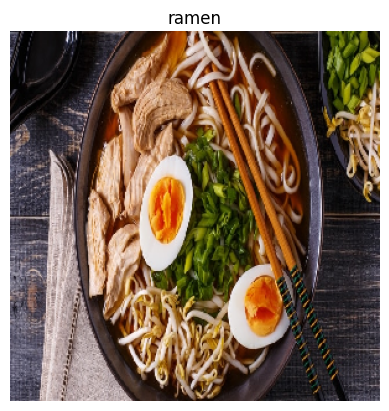

1/1 [==============================] - 0s 48ms/step


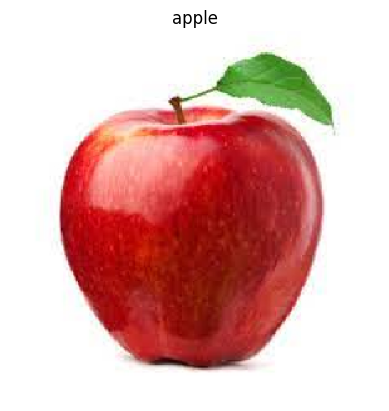

1/1 [==============================] - 0s 29ms/step


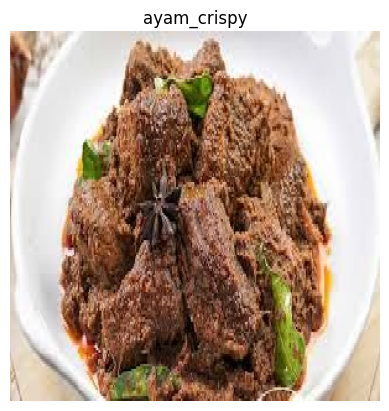

1/1 [==============================] - 0s 39ms/step


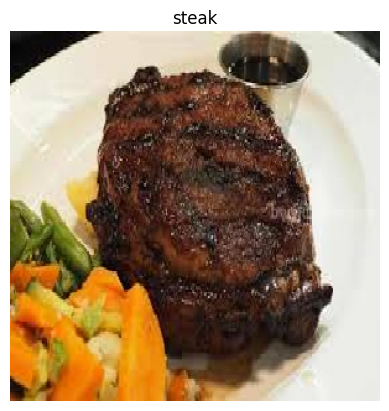

In [47]:
images = []
images.append('french-fries.jpg')
images.append('donut.jpg')
images.append('durian.jpeg')
images.append('banana.jpeg')
images.append('ramen.jpg')
images.append('apple.jpeg')
images.append('rendang.jpeg')
images.append('steak.jpeg')
predict_class(model_best, images, True)

In [38]:
saved_model_path = './model_fix'
model.save(saved_model_path)
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('./model_fix/inception_fix.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: ./model_fix\assets


INFO:tensorflow:Assets written to: ./model_fix\assets


In [39]:
file = open('./model_fix/class.txt','w')
for item in class_new:
	file.write(item+"\n")
file.close()

In [2]:
import os
class_fix = os.listdir('C:/Users/LENOVO/train_fix')
len(class_fix)

69

In [3]:
file = open('./model_fix/class_fix.txt','w')
for item in class_fix:
	file.write(item+"\n")
file.close()